In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
Original_DS = pd.read_csv(r"C:\Users\Acer\Downloads\DataCo Supply chain dataset\DataCoSupplyChainDataset.csv", engine='python')

In [11]:
Original_DS.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [12]:
Original_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [19]:
Customer_DS = Original_DS.iloc[:,9:20]
Customer_DS.head(5)

,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0
1,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0
2,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0
3,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0
4,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0


In [36]:
Product_DS = Original_DS.iloc[:,44:53]
Product_DS = pd.concat([Product_DS, Original_DS.iloc[:,4]], axis=1, join="inner")
Product_DS.head(10)

,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Sales per customer
0,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,314.640015
1,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,311.359985
2,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,309.720001
3,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,304.809998
4,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,298.250000
5,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class,294.980011
6,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class,288.420013
7,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class,285.140015
8,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class,278.589996
9,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class,275.309998


In [34]:
Orders_DS = Original_DS.iloc[:,20:43]
Orders_DS = pd.concat([Orders_DS, Original_DS.iloc[:,0:4],Original_DS.iloc[:,5:7],Original_DS.iloc[:,52:53]], axis=1, join="inner")
Orders_DS.head(10)

,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,...,Order Region,Order State,Order Status,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Shipping Mode
0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,...,Southeast Asia,Java Occidental,COMPLETE,DEBIT,3,4,91.250000,Advance shipping,0,Standard Class
1,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,...,South Asia,Rajastán,PENDING,TRANSFER,5,4,-249.089996,Late delivery,1,Standard Class
2,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,...,South Asia,Rajastán,CLOSED,CASH,4,4,-247.779999,Shipping on time,0,Standard Class
3,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,...,Oceania,Queensland,COMPLETE,DEBIT,3,4,22.860001,Advance shipping,0,Standard Class
4,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,...,Oceania,Queensland,PENDING_PAYMENT,PAYMENT,2,4,134.210007,Advance shipping,0,Standard Class
5,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,1/13/2018 11:03,75935,...,Oceania,Queensland,CANCELED,TRANSFER,6,4,18.580000,Shipping canceled,0,Standard Class
6,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,...,Eastern Asia,Guangdong,COMPLETE,DEBIT,2,1,95.180000,Late delivery,1,First Class
7,2,Fitness,25.928869,-80.162872,Pacific Asia,Guangzhou,China,19486,1/13/2018 10:21,75933,...,Eastern Asia,Guangdong,PROCESSING,TRANSFER,2,1,68.430000,Late delivery,1,First Class
8,2,Fitness,18.233223,-66.037056,Pacific Asia,Guangzhou,China,19485,1/13/2018 10:00,75932,...,Eastern Asia,Guangdong,CLOSED,CASH,3,2,133.720001,Late delivery,1,Second Class
9,2,Fitness,37.773991,-121.966629,Pacific Asia,Guangzhou,China,19484,1/13/2018 9:39,75931,...,Eastern Asia,Guangdong,CLOSED,CASH,2,1,132.149994,Late delivery,1,First Class


In [35]:
Orders_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Department Id                  180519 non-null  int64  
 1   Department Name                180519 non-null  object 
 2   Latitude                       180519 non-null  float64
 3   Longitude                      180519 non-null  float64
 4   Market                         180519 non-null  object 
 5   Order City                     180519 non-null  object 
 6   Order Country                  180519 non-null  object 
 7   Order Customer Id              180519 non-null  int64  
 8   order date (DateOrders)        180519 non-null  object 
 9   Order Id                       180519 non-null  int64  
 10  Order Item Cardprod Id         180519 non-null  int64  
 11  Order Item Discount            180519 non-null  float64
 12  Order Item Discount Rate      

<AxesSubplot:>

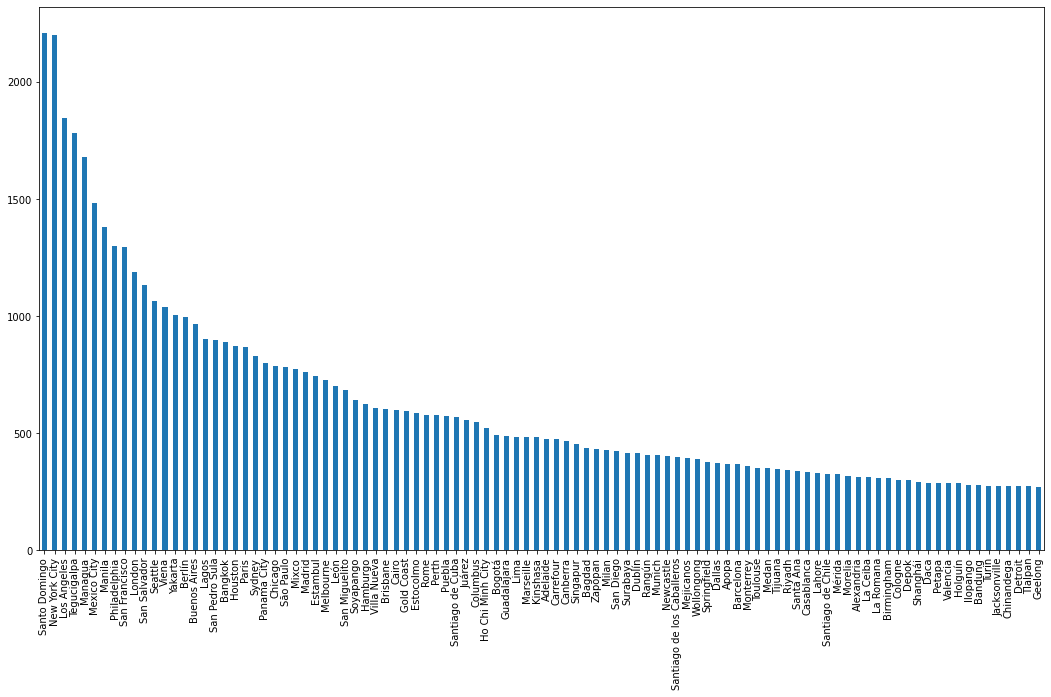

In [85]:
x=Orders_DS["Order City"].value_counts()
y=Orders_DS["Order Region"].value_counts()
f, ax = plt.subplots(figsize=(18,10))
x[:100].plot(kind="bar",width =0.5)


<AxesSubplot:ylabel='Order Region'>

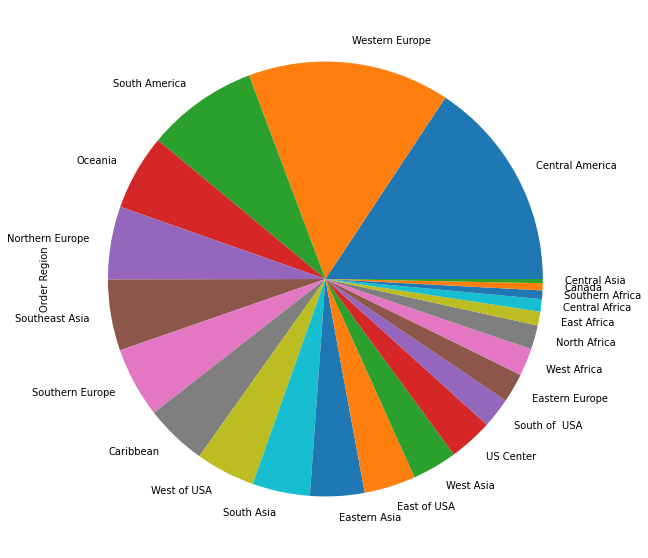

In [102]:
y.plot(kind="pie",figsize=(14,10))

<AxesSubplot:>

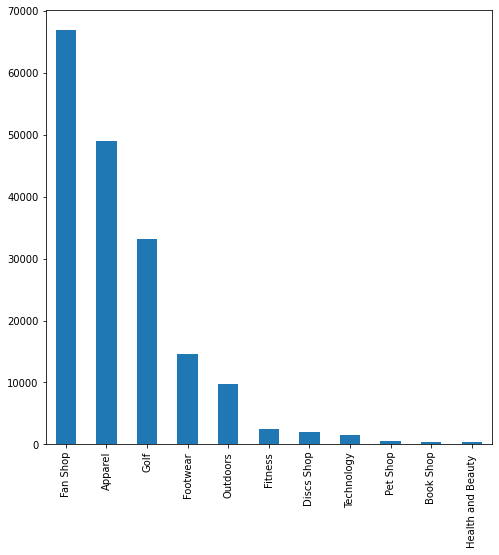

In [89]:
z=Orders_DS["Department Name"].value_counts()
z.plot(kind="bar",figsize=(8,8))